In [1]:
#importing the pyarabic library
import pyarabic.araby as araby
import re

#importing the pandas library.
import pandas as pd
sample_tweets = pd.read_csv("sample_tweets.csv")
sample_tweets.head()



,Class,Tweet
0,neg,#الوتر_جنة_القلوب سبحانك آللهم و بحمدك أشهد أن...
1,pos,الإبداع في عالم المستديرة لا يقتصر فقط على الم...
2,neg,على اساس ان القرار بيد الشرعيه 😂😂 ما وراء الست...
3,pos,📸 المطرقة الوردية متواجده لدعم الفتيات في كوتش...
4,pos,عرفت المكان 😂


In [2]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)

#importing stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('arabic'))

# loop over each tweet and make the desired changes in place
for i, tweet in enumerate(sample_tweets["Tweet"]):
    # remove mentions
    if re.search("@[A-Za-z0-9_-]*", tweet):
        mention = re.findall("@[A-Za-z0-9_-]*", tweet)
        for j in mention:
            tweet = tweet.replace(j, "")
    # remove stop words
    tweet_list = tweet.split()
    for stop_word in stop_words:
        for word in tweet_list:
            if stop_word == word:
                tweet_list.remove(word)
    tweet = " ".join(tweet_list)
    # normalize Arabic text
    tweet = araby.strip_diacritics(tweet)
    tweet = araby.normalize_hamza(tweet)
    tweet = araby.strip_tatweel(tweet)
    tweet = re.sub("[0-9]", "", tweet)
    tweet = re.sub(r"http\S+", "", tweet)
    # remove emojis
    one_line = tweet.replace("\n", "")
    tweet = emoji_pattern.sub(r'', one_line)
    # update the tweet in the dataframe
    sample_tweets.at[i, "Tweet"] = tweet
    
sample_tweets.head()

,Class,Tweet
0,neg,#الوتر_جنة_القلوب سبحانك ءءللهم بحمدك ءشهد لءء...
1,pos,الءبداع عالم المستديرة يقتصر فقط المهارات الفن...
2,neg,اساس ان القرار الشرعيه وراء الستار امور تعلمه...
3,pos,المطرقة الوردية متواجده لدعم الفتيات كوتشيلا ...
4,pos,عرفت المكان


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
import numpy as np
def train_model(model, data, targets):
    text_clf = Pipeline([
    ('vect', CountVectorizer()), #Convert a collection of text documents to a matrix of token counts.
    ('tfidf', TfidfTransformer()), #Transform a count matrix to a normalized tf (term-frequency) or tf-idf representation .
    ('clf', model), #here we put our classification model
    ])
    text_clf.fit(data, targets) #model training
    return text_clf
#Partioning the scaled dataset to two partitions: features and target class
data = sample_tweets["Tweet"].values
target = sample_tweets["Class"].values
#Splitting the data to test set and train set. 
#importing splitting module
from sklearn.model_selection import train_test_split
#specifying the size of the test set, 30%, the rest is the train set, 70%.
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

In [4]:
# importing DT classifier
from sklearn.tree import DecisionTreeClassifier
model = train_model(DecisionTreeClassifier(), X_train, y_train)
y_pred=model.predict(X_test)

In [5]:
#Evaluating the classifier using the "metrics" module.
from sklearn import metrics

#Checking the accuracy.
metrics.accuracy_score(y_test, y_pred)

0.5933333333333334

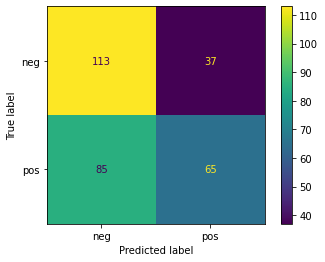

In [6]:
#Plotting the confusion matrix for a better look.
metrics.plot_confusion_matrix(model, X_test, y_test)

In [7]:
#using KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
model = train_model(KNeighborsClassifier(n_neighbors=5), X_train, y_train)
y_pred=model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.63

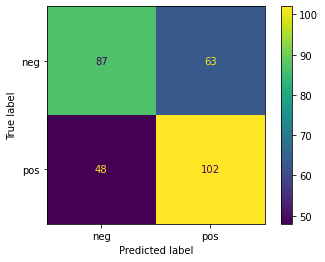

In [8]:
metrics.plot_confusion_matrix(model, X_test, y_test)

In [9]:
from sklearn.svm import SVC
model = train_model(SVC(), X_train, y_train)
y_pred=model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.6766666666666666

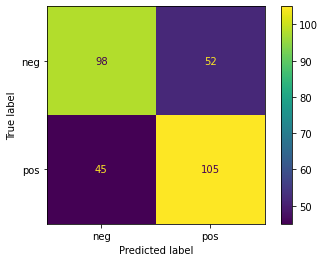

In [10]:
metrics.plot_confusion_matrix(model, X_test, y_test)

In [11]:
from sklearn.ensemble import RandomForestClassifier
model = train_model(RandomForestClassifier(n_estimators = 100), X_train, y_train)
y_pred=model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.6266666666666667

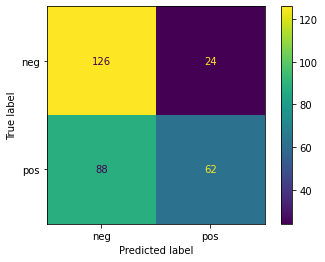

In [12]:
metrics.plot_confusion_matrix(model, X_test, y_test)

In [13]:
from sklearn.neural_network import MLPClassifier

model = train_model(MLPClassifier(hidden_layer_sizes=(500,500,500), activation='relu', max_iter=500), X_train, y_train)
y_pred=model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.6366666666666667

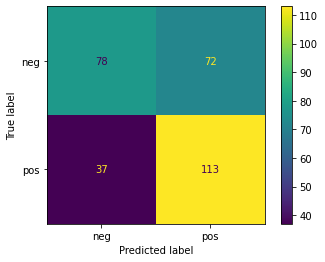

In [14]:
metrics.plot_confusion_matrix(model, X_test, y_test)

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
model = train_model(GradientBoostingClassifier(n_estimators = 100), X_train, y_train)
y_pred=model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.6233333333333333

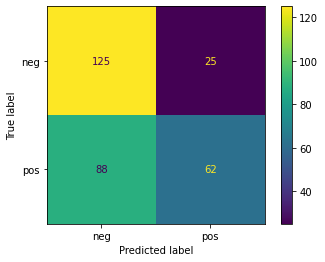

In [16]:
metrics.plot_confusion_matrix(model, X_test, y_test)

In [17]:
import xgboost as xgb
from xgboost import XGBClassifier
model = train_model(XGBClassifier(), X_train, y_train)
y_pred=model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

[22:21:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.6166666666666667

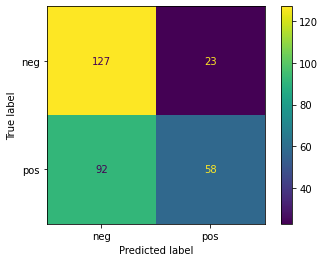

In [18]:
metrics.plot_confusion_matrix(model, X_test, y_test)

In [19]:
from sklearn.neighbors import NearestCentroid
model = train_model(NearestCentroid(), X_train, y_train)
y_pred=model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.68

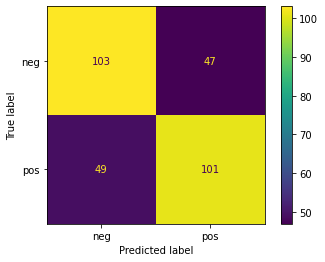

In [20]:
metrics.plot_confusion_matrix(model, X_test, y_test)

In [21]:
from sklearn.linear_model import LogisticRegression
model = train_model(LogisticRegression(), X_train, y_train)
y_pred=model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.6766666666666666

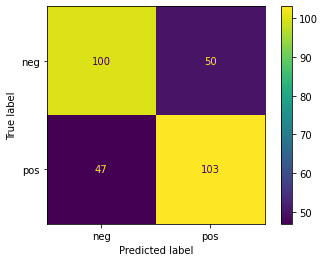

In [22]:
metrics.plot_confusion_matrix(model, X_test, y_test)